In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from PIL import Image
import cv2
import numpy as np # linear algebra
import os
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adadelta
from keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D
import matplotlib.pyplot as plt
from keras.layers.pooling import MaxPooling2D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("./cell_images/"))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['Parasitized', 'Untitled.ipynb', 'Uninfected', '.ipynb_checkpoints']


In [2]:
data=[]
labels=[]
parasitized_path =os.listdir("./cell_images/Parasitized/")
for pars in parasitized_path:
    try:
        image=cv2.imread("./cell_images/Parasitized/"+ pars)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        #image_from_array = image_from_array.convert('L')
        data.append(np.array(size_image))
        labels.append(0)
    except Exception as e:
        print(e)

'NoneType' object has no attribute '__array_interface__'


In [3]:
uninfected_path=os.listdir("./cell_images/Uninfected/")
for unef in uninfected_path:
    try:
        image=cv2.imread("./cell_images/Uninfected/" + unef)
        image_from_array = Image.fromarray(image, 'RGB')
        #image_from_array = image_from_array.convert('L')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except Exception as e:
        print(e)

'NoneType' object has no attribute '__array_interface__'


In [4]:
print('Lenght of Data : ' + str(len(data)))
print('Lenght of Data : ' + str(len(labels)))


Lenght of Data : 27558
Lenght of Data : 27558


In [5]:
numpy_data = np.array(data)
numpy_labels = np.array(labels)
s = np.arange(numpy_data.shape[0])
print(s)
np.random.shuffle(s)
print(s)
numpy_data = numpy_data[s]
numpy_labels = numpy_labels[s]
data_length = len(numpy_data)


[    0     1     2 ... 27555 27556 27557]
[19689  5572  4867 ... 10705 10674  2203]


In [6]:
print('Lenght of Data : ' + str(len(numpy_data)))
print('Lenght of Data : ' + str(len(numpy_labels)))

Lenght of Data : 27558
Lenght of Data : 27558


In [7]:
training_X = numpy_data[:round(data_length * 0.95)]
training_Y = numpy_labels[:round(data_length * 0.95)]
#val_X = numpy_data[len(training_X) :round((len(training_X)) + (len(training_X) * 0.05)) ]
#val_Y = numpy_labels[len(training_Y) :round((len(training_Y)) + (len(training_Y) * 0.05))]
test_X = numpy_data[round((len(training_X))) : ]
test_Y = numpy_labels[round((len(training_Y))): ]

In [8]:
training_X = training_X.astype('float64') / 255
#val_X = val_X.astype('float64') / 255
test_X = test_X.astype('float64') / 255


In [9]:
visible = Input(shape=(64,64,3))

conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(32, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(16, kernel_size=4, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

flat = Flatten()(pool3)
hidden1 = Dense(8, activation='relu')(flat)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(4, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(hidden2)

output = Dense(1, activation='sigmoid')(dropout2)
model = Model(inputs=visible, outputs=output)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        3136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        8208      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
__________

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:

graph_viz = model.fit(
        training_X,
        training_Y,
        epochs = 10,
        batch_size = 64,
        validation_data=(test_X,test_Y)    
        )


Train on 26180 samples, validate on 1378 samples
Epoch 1/10
26180/26180 [==============================] - 373s 14ms/step - loss: 0.4756 - acc: 0.7490 - val_loss: 0.2092 - val_acc: 0.9340
Epoch 2/10
26180/26180 [==============================] - 351s 13ms/step - loss: 0.2360 - acc: 0.9266 - val_loss: 0.1624 - val_acc: 0.9550
Epoch 3/10
26180/26180 [==============================] - 355s 14ms/step - loss: 0.1967 - acc: 0.9463 - val_loss: 0.1461 - val_acc: 0.9586
Epoch 4/10
26180/26180 [==============================] - 323s 12ms/step - loss: 0.1866 - acc: 0.9483 - val_loss: 0.1257 - val_acc: 0.9637
Epoch 5/10
26180/26180 [==============================] - 337s 13ms/step - loss: 0.1746 - acc: 0.9501 - val_loss: 0.1262 - val_acc: 0.9615
Epoch 6/10
26180/26180 [==============================] - 328s 13ms/step - loss: 0.1664 - acc: 0.9509 - val_loss: 0.1169 - val_acc: 0.9630
Epoch 7/10
26180/26180 [==============================] - 347s 13ms/step - loss: 0.1608 - acc: 0.9518 - val_loss: 0.1

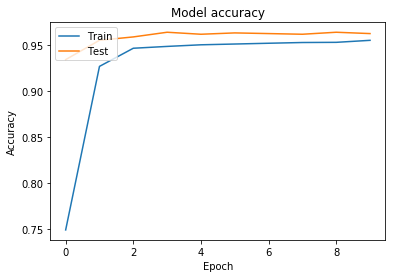

In [12]:
plt.plot(graph_viz.history['acc'])
plt.plot(graph_viz.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

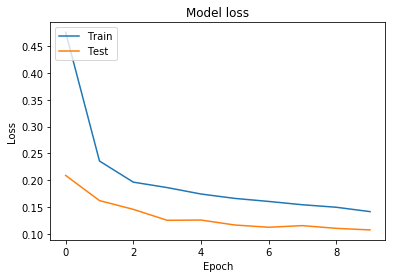

In [13]:
plt.plot(graph_viz.history['loss'])
plt.plot(graph_viz.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [14]:
import time
a = time.time()
print(model.predict(test_X[10].reshape((1,64,64,3))))
b = time.time()
c = b - a
print(c)

[[0.99479276]]
0.537891149520874


In [15]:
test_Y[10]


1

In [16]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")